# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

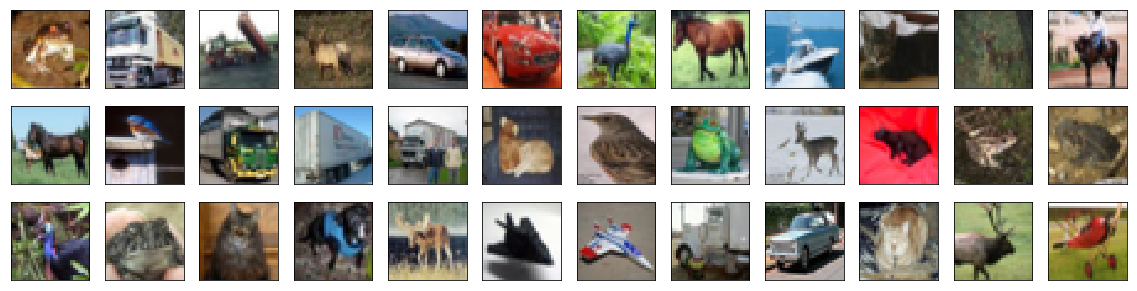

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(.25))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 64)          0         
__________

### 6. Compile the Model 

In [40]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [41]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=8192, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 2.29724, saving model to model.weights.best.hdf5
6s - loss: 2.7461 - acc: 0.1017 - val_loss: 2.2972 - val_acc: 0.1098
Epoch 2/100
Epoch 00001: val_loss did not improve
3s - loss: 2.4569 - acc: 0.1151 - val_loss: 2.4315 - val_acc: 0.0982
Epoch 3/100
Epoch 00002: val_loss improved from 2.29724 to 2.20698, saving model to model.weights.best.hdf5
3s - loss: 2.3581 - acc: 0.1358 - val_loss: 2.2070 - val_acc: 0.1844
Epoch 4/100
Epoch 00003: val_loss improved from 2.20698 to 2.11341, saving model to model.weights.best.hdf5
3s - loss: 2.3424 - acc: 0.1558 - val_loss: 2.1134 - val_acc: 0.2352
Epoch 5/100
Epoch 00004: val_loss did not improve
3s - loss: 2.1560 - acc: 0.2153 - val_loss: 2.1393 - val_acc: 0.2186
Epoch 6/100
Epoch 00005: val_loss did not improve
3s - loss: 2.1504 - acc: 0.2272 - val_loss: 2.3270 - val_acc: 0.1722
Epoch 7/100
Epoch 00006: val_loss improved from 2.11341 to 1.99018,

Epoch 00057: val_loss did not improve
3s - loss: 1.3577 - acc: 0.5171 - val_loss: 1.3159 - val_acc: 0.5512
Epoch 59/100
Epoch 00058: val_loss improved from 1.29258 to 1.26721, saving model to model.weights.best.hdf5
3s - loss: 1.3709 - acc: 0.5137 - val_loss: 1.2672 - val_acc: 0.5640
Epoch 60/100
Epoch 00059: val_loss did not improve
3s - loss: 1.3699 - acc: 0.5155 - val_loss: 1.2722 - val_acc: 0.5574
Epoch 61/100
Epoch 00060: val_loss improved from 1.26721 to 1.26673, saving model to model.weights.best.hdf5
3s - loss: 1.3476 - acc: 0.5244 - val_loss: 1.2667 - val_acc: 0.5614
Epoch 62/100
Epoch 00061: val_loss did not improve
3s - loss: 1.3392 - acc: 0.5211 - val_loss: 1.2834 - val_acc: 0.5396
Epoch 63/100
Epoch 00062: val_loss did not improve
3s - loss: 1.3557 - acc: 0.5199 - val_loss: 1.3058 - val_acc: 0.5446
Epoch 64/100
Epoch 00063: val_loss improved from 1.26673 to 1.22184, saving model to model.weights.best.hdf5
3s - loss: 1.3328 - acc: 0.5286 - val_loss: 1.2218 - val_acc: 0.5754

### 8. Load the Model with the Best Validation Accuracy

In [42]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [43]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6036


### Accuracy Comparison

* Original Architecture: .7239

### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [18]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

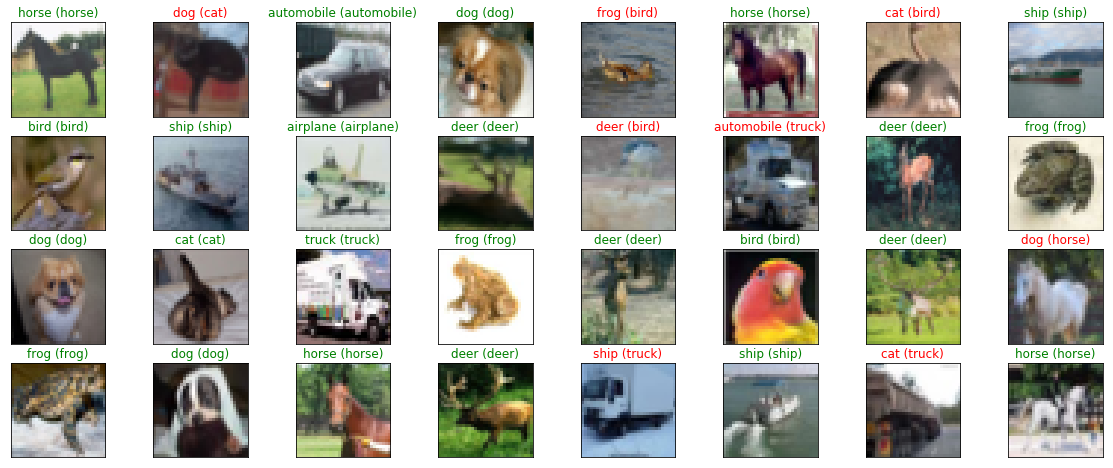

In [20]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))